<a href="https://colab.research.google.com/github/danielhuang1991/Covid19-DFW/blob/master/p6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import io

In [0]:
from google.colab import files
uploaded = files.upload()

Saving covid_19_data.csv to covid_19_data (2).csv


In [0]:
covid = pd.read_csv(io.BytesIO(uploaded['covid_19_data.csv']))
covid.head()

,SNo,ObservationDate,Country/Region,Confirmed,Deaths
0,1,3/4/2020,Collin,0,0
1,2,3/4/2020,Dallas,0,0
2,3,3/4/2020,Denton,0,0
3,4,3/4/2020,Hunt,0,0
4,5,3/4/2020,Kaufman,0,0


In [0]:
print("Size/Shape of the dataset: ",covid.shape)
print("Checking for null values:\n",covid.isnull().sum())
print("Checking Data-type of each column:\n",covid.dtypes)

Size/Shape of the dataset:  (513, 5)
Checking for null values:
 SNo                0
ObservationDate    0
Country/Region     0
Confirmed          0
Deaths             0
dtype: int64
Checking Data-type of each column:
 SNo                 int64
ObservationDate    object
Country/Region     object
Confirmed           int64
Deaths              int64
dtype: object


In [0]:
covid.drop(["SNo"],1,inplace=True)
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

In [0]:
datewise=covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Deaths":'sum'})
print("Basic Information")
print("Number of counties in DFW area ",len(covid["Country/Region"].unique()))
print("Total number of Confirmed Cases in DFW area: ",datewise["Confirmed"].iloc[-1])
print("Total number of Deaths Cases in DFW area: ",datewise["Deaths"].iloc[-1])
print("Total number of Active Cases in DFW area: ",(datewise["Confirmed"].iloc[-1]-datewise["Deaths"].iloc[-1]))


Basic Information
Number of counties in DFW area  9
Total number of Confirmed Cases in DFW area:  7007
Total number of Deaths Cases in DFW area:  196
Total number of Active Cases in DFW area:  6811


Text(0, 0.5, 'County')

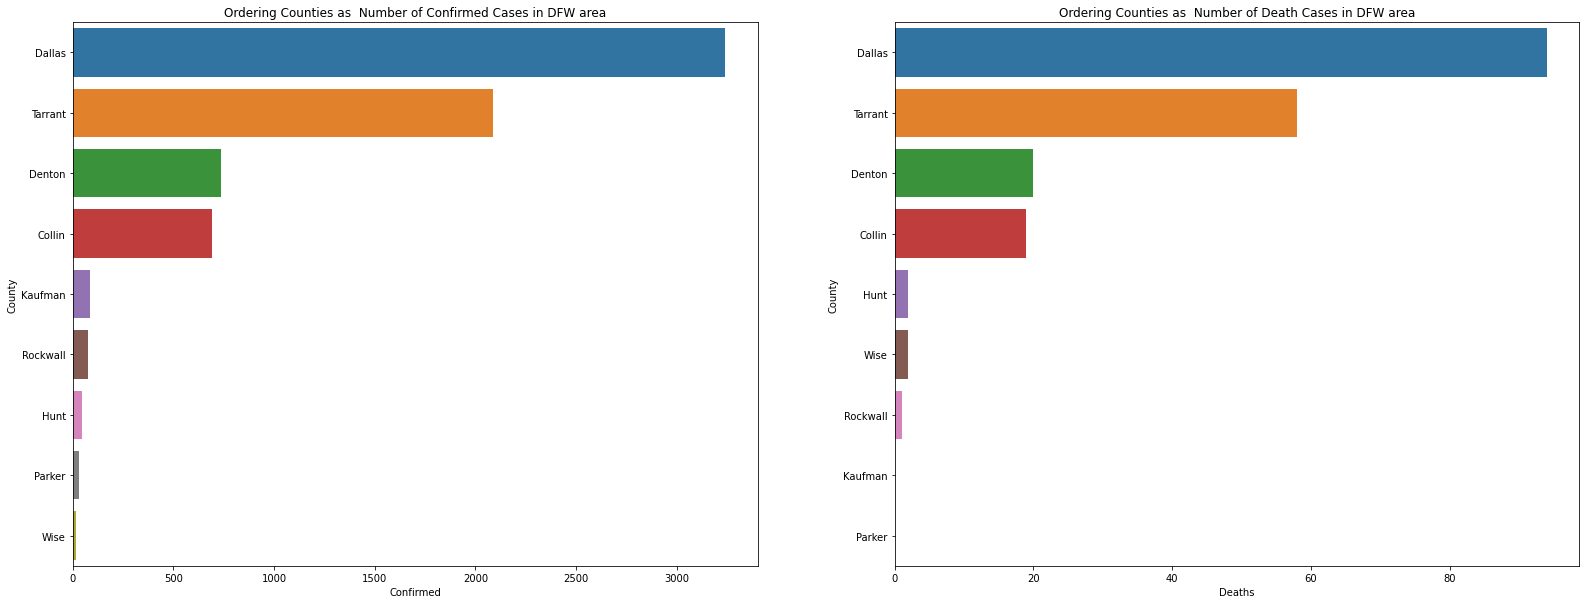

In [0]:
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(27,10))
topConfirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
topDeaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=topConfirmed["Confirmed"],y=topConfirmed.index,ax=ax1)
ax1.set_title("Ordering Counties as  Number of Confirmed Cases in DFW area")
ax1.set_ylabel("County")
sns.barplot(x=topDeaths["Deaths"],y=topDeaths.index,ax=ax2)
ax2.set_title("Ordering Counties as  Number of Death Cases in DFW area")
ax2.set_ylabel("County")

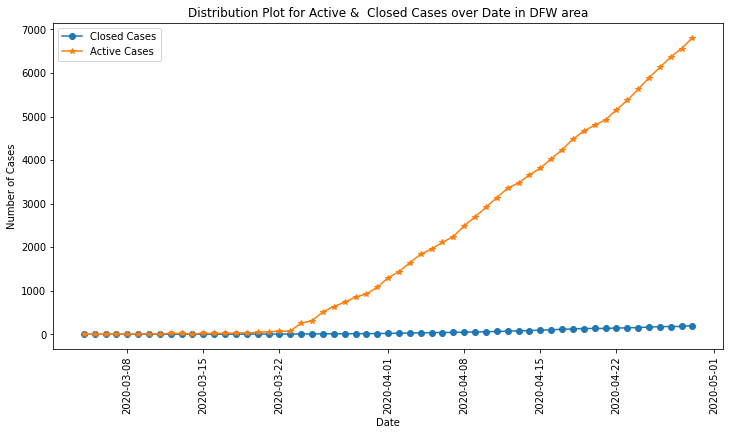

In [0]:
plt.figure(figsize=(12,6))
plt.plot(datewise["Deaths"],marker="o",label="Closed Cases")
plt.plot(datewise["Confirmed"]-datewise["Deaths"],marker="*",label="Active Cases")
plt.ylabel("Number of Cases")
plt.xlabel("Date")
plt.ticklabel_format(axis='y', style='plain')
plt.title("Distribution Plot for Active &  Closed Cases over Date in DFW area")
plt.xticks(rotation=90)
plt.legend()

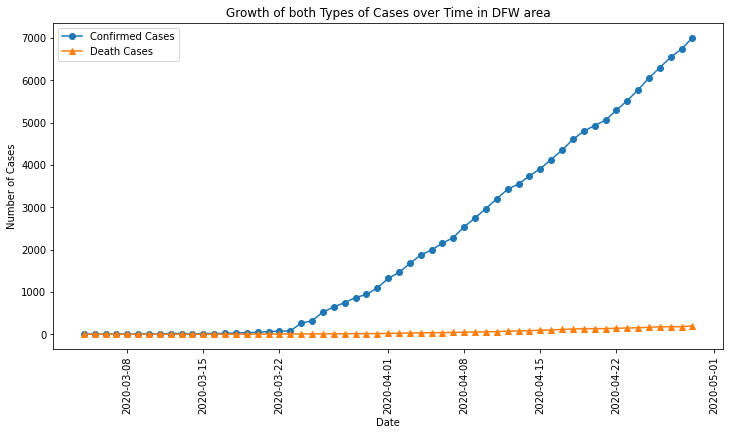

In [0]:
plt.figure(figsize=(12,6))
plt.plot(datewise["Confirmed"],marker="o",label="Confirmed Cases")
plt.plot(datewise["Deaths"],marker="^",label="Death Cases")
plt.ylabel("Number of Cases")
plt.xlabel("Date")
plt.ticklabel_format(axis='y', style='plain')
plt.xticks(rotation=90)
plt.title("Growth of both Types of Cases over Time in DFW area")
plt.legend()

In [0]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days
train_ml=datewise.iloc[:int(datewise.shape[0]*0.90)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.90):]
model_scores=[]
lin_reg=LinearRegression(normalize=True)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))

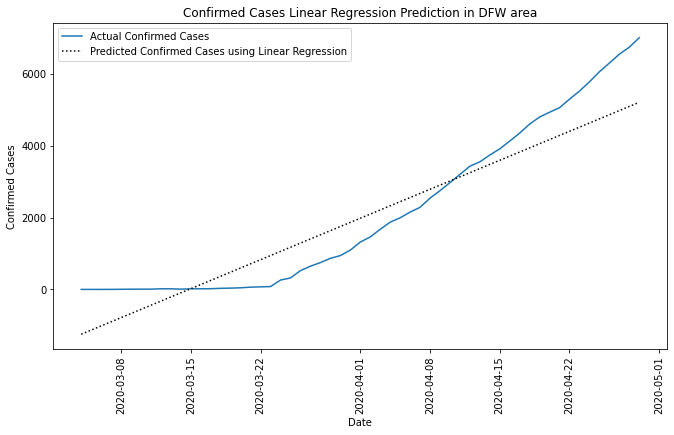

In [0]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
plt.plot(datewise["Confirmed"],label="Actual Confirmed Cases")
plt.plot(datewise.index,prediction_linreg, linestyle=':',label="Predicted Confirmed Cases using Linear Regression",color='black')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Linear Regression Prediction in DFW area")
plt.xticks(rotation=90)
plt.ticklabel_format(axis='y', style='plain')
plt.legend()

In [0]:
svm=SVR(C=1,degree=3,kernel='poly',epsilon=0.01)
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

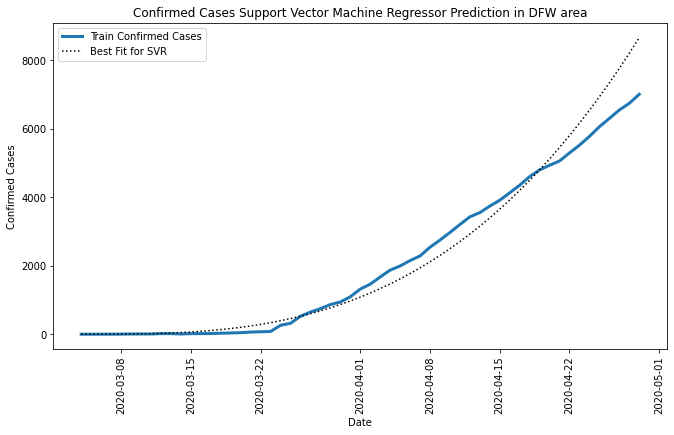

In [0]:
plt.figure(figsize=(11,6))
prediction_svm=svm.predict(np.array(datewise["Days Since"]).reshape(-1,1))
plt.plot(datewise["Confirmed"],label="Train Confirmed Cases",linewidth=3)
plt.plot(datewise.index,prediction_svm, linestyle=':',label="Best Fit for SVR",color='black')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Support Vector Machine Regressor Prediction in DFW area")
plt.xticks(rotation=90)
plt.ticklabel_format(axis='y', style='plain')
plt.legend()